# 图像基本操作

## 数据读取-图像

- `cv2.IMREAD_COLOR` 彩色图像
- `cv2.IMREAD_GRAYSCALE` 灰度图像

In [6]:
%matplotlib inline
import cv2  # 使用BGR
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img = cv2.imread('./cat.jpg')
print(img.shape)
print(img)  # [H, W, C]

(414, 500, 3)
[[[142 151 160]
  [146 155 164]
  [151 160 170]
  ...
  [156 172 185]
  [155 171 184]
  [154 170 183]]

 [[108 117 126]
  [112 123 131]
  [118 127 137]
  ...
  [155 171 184]
  [154 170 183]
  [153 169 182]]

 [[108 119 127]
  [110 123 131]
  [118 128 138]
  ...
  [156 169 183]
  [155 168 182]
  [154 167 181]]

 ...

 [[162 186 198]
  [157 181 193]
  [142 166 178]
  ...
  [181 204 206]
  [170 193 195]
  [149 172 174]]

 [[140 164 176]
  [147 171 183]
  [139 163 175]
  ...
  [169 187 188]
  [125 143 144]
  [106 124 125]]

 [[154 178 190]
  [154 178 190]
  [121 145 157]
  ...
  [183 198 200]
  [128 143 145]
  [127 142 144]]]


In [11]:
cv2.imshow('image', img)
cv2.waitKey(0)      # 0表示任意键终止
# cv2.waitKey(1000)   # 1000ms后关闭
cv2.destroyAllWindows()

In [12]:
def cv_show(name: str, img: np.ndarray) -> None:
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [13]:
img.shape   # h w c

(414, 500, 3)

In [17]:
img = cv2.imread('./cat.jpg', cv2.IMREAD_COLOR)             # 彩色图像
img_gray = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)    # 灰度图像
print(img_gray)

[[153 157 162 ... 174 173 172]
 [119 124 129 ... 173 172 171]
 [120 124 130 ... 172 171 170]
 ...
 [187 182 167 ... 202 191 170]
 [165 172 164 ... 185 141 122]
 [179 179 146 ... 197 142 141]]


In [18]:
img_gray.shape

(414, 500)

In [19]:
cv_show('gray', img_gray)

In [20]:
cv2.imwrite('mycat.png', img_gray)

True

In [21]:
type(img_gray)

numpy.ndarray

In [22]:
img_gray.size

207000

In [23]:
img_gray.dtype

dtype('uint8')

## 数据读取-视频

- `cv2.VideoCapture` 可以捕获摄像头；用数字来控制不同的设备
- 如果是视频文件，直接指定好路径

In [43]:
vc = cv2.VideoCapture('./test.mp4')

In [44]:
if vc.isOpened():
    opened, frame = vc.read()   # frame 是一帧
else:
    opened = False

In [45]:
print(opened)

True


In [46]:
while opened:
    opened, frame = vc.read()
    if frame is None:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('result', frame_gray)
    if cv2.waitKey(10) & 0xFF == 27: # waitKey返回按下的键，27代表Esc
        break
vc.release()
cv2.destroyAllWindows()

## 截取ROI区域

> ROI - 你感兴趣的

In [48]:
img = cv2.imread('./cat.jpg')
cat = img[0:50, 0:200]
cv_show('cat', cat)

## 颜色通道提取

In [49]:
b, g, r = cv2.split(img)

In [50]:
print(b)

[[142 146 151 ... 156 155 154]
 [108 112 118 ... 155 154 153]
 [108 110 118 ... 156 155 154]
 ...
 [162 157 142 ... 181 170 149]
 [140 147 139 ... 169 125 106]
 [154 154 121 ... 183 128 127]]


In [51]:
print(b.shape)

(414, 500)


In [53]:
img = cv2.merge((b, g, r))
print(img.shape)

(414, 500, 3)


In [55]:
# 只保留R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show('R', cur_img)

In [56]:
# 只保留G
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 2] = 0
cv_show('R', cur_img)

In [57]:
# 只保留B
cur_img = img.copy()
cur_img[:, :, 1] = 0
cur_img[:, :, 2] = 0
cv_show('R', cur_img)

## 边界填充

In [59]:
top_size, bottom_size, left_size, rigth_size = 50, 50, 50, 50

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, rigth_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, rigth_size, borderType=cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, rigth_size, borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, rigth_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, rigth_size, borderType=cv2.BORDER_CONSTANT, value=0)

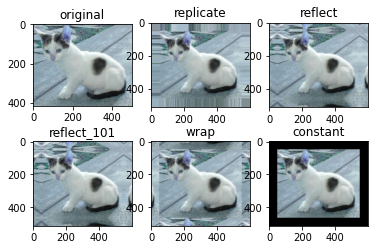

In [60]:
# 2行3列，第1个
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect_101, 'gray'), plt.title('reflect_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')

plt.show()

- `cv2.BORDER_REPLICATE` 复制法，也就是复制最边缘的像素
- `cv2.BORDER_REFLECT` 反射法，对感兴趣的图像中的像素在两边进行复制（对称）（轴也复制）
- `cv2.BORDER_REFLECT101` 反射法，以最边缘的像素为轴（对称）（这个轴不复制）
- `cv2.BORDER_WRAP` 外包装法（相当于在图像周围又围一圈这个图像，然后截取）
- `cv2.BORDER_CONSTANT` 常量法，用指定常数值（value）进行填充

## 数值计算

In [61]:
img_cat = cv2.imread('./cat.jpg')
img_dog = cv2.imread('./dog.jpg')

In [62]:
img_cat2 = img_cat + 10
print(img_cat2[:5, :, 0])

[[152 156 161 ... 166 165 164]
 [118 122 128 ... 165 164 163]
 [118 120 128 ... 166 165 164]
 [149 151 158 ... 166 165 164]
 [163 166 173 ... 170 169 168]]


In [63]:
print(img_cat[:5, :, 0])

[[142 146 151 ... 156 155 154]
 [108 112 118 ... 155 154 153]
 [108 110 118 ... 156 155 154]
 [139 141 148 ... 156 155 154]
 [153 156 163 ... 160 159 158]]


In [64]:
# 越界自动 % 256
(img_cat + img_cat2)[:5, :, 0]

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [65]:
# 越界取最大值255
cv2.add(img_cat, img_cat2)[:5, :, 0]

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [66]:
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [68]:
print(img_cat.shape)
print(img_dog.shape)

(414, 500, 3)
(429, 499, 3)


In [79]:
img_dog2 = cv2.resize(img_dog, (500, 414))
print(img_dog2.shape)

(414, 500, 3)


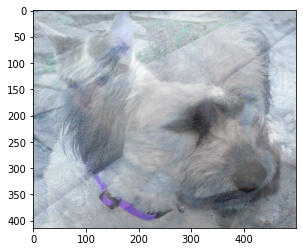

In [82]:
# R = 0.4 x1 + 0.6 x2 + 1
res = cv2.addWeighted(img_cat, 0.4, img_dog2, 0.6, 1)
plt.imshow(res)

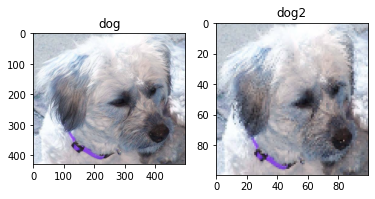

In [76]:
# 2行3列，第1个
plt.subplot(121), plt.imshow(img_dog), plt.title('dog')
plt.subplot(122), plt.imshow(cv2.resize(img_dog, (100, 100))), plt.title('dog2')

plt.show()

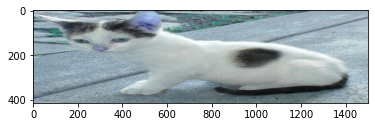

In [77]:
# x放大3倍， y不变
res = cv2.resize(img_cat, (0, 0), fx=3, fy=1)
plt.imshow(res)

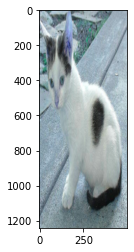

In [78]:
# x放大3倍， y不变
res = cv2.resize(img_cat, (0, 0), fx=1, fy=3)
plt.imshow(res)